In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from Baysian_Mat import Bayesian_Matte
from PIL import Image, ImageOps
import time  # Execution TIme imports
import psutil


from laplac import Laplacianmatting
from compositing import compositing
from QualityTest import mse2d
from QualityTest import sad2d
from QualityTest import psnr2d
from smooth import smooth


In [3]:
# Step 1 : Read image, GT and trimap.
image = np.array(Image.open(
    "C:/Users/aduttagu/Desktop/Main/Bayesian-Matting-Implementation/Image Dataset/input_training_lowres/GT16.png"))
image_trimap = np.array(ImageOps.grayscale(Image.open(
    "C:/Users/aduttagu/Desktop/Main/Bayesian-Matting-Implementation/Image Dataset/trimap_training_lowres/Trimap1/GT16.png")))
GT = np.array(ImageOps.grayscale(Image.open(
    "C:/Users/aduttagu/Desktop/Main/Bayesian-Matting-Implementation/Image Dataset/gt_training_lowres/GT16.png")))

In [4]:
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

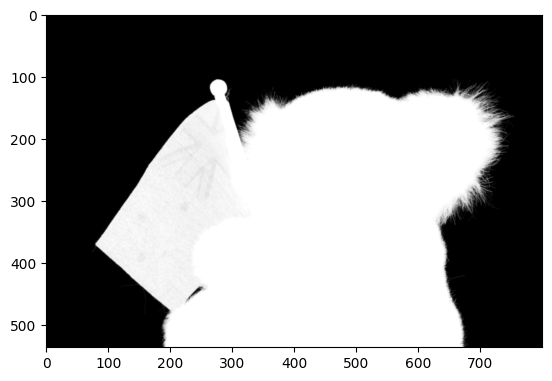

In [5]:
plt.imshow(GT, cmap = "gray")
plt.show()

In [6]:
# Step 2 : Calculating Bayesian Matte for the given trimap
window_size = 75
N = window_size
alpha, pixel_count = Bayesian_Matte(image, image_trimap, N)

# Step 3 : Making it back to range (0-255) for display purpose
alpha_disp = alpha * 255
alpha_int8 = np.array(alpha, dtype=int)
GT2 = GT

Successfully Calculated : 1000.0 out of unknown Pixels : 87834.
Successfully Calculated : 2000.0 out of unknown Pixels : 87834.
Successfully Calculated : 3000.0 out of unknown Pixels : 87834.
Successfully Calculated : 4000.0 out of unknown Pixels : 87834.
Successfully Calculated : 5000.0 out of unknown Pixels : 87834.
Successfully Calculated : 6000.0 out of unknown Pixels : 87834.
Successfully Calculated : 7000.0 out of unknown Pixels : 87834.
Successfully Calculated : 8000.0 out of unknown Pixels : 87834.
Successfully Calculated : 9000.0 out of unknown Pixels : 87834.
Successfully Calculated : 10000.0 out of unknown Pixels : 87834.
Successfully Calculated : 11000.0 out of unknown Pixels : 87834.
Successfully Calculated : 12000.0 out of unknown Pixels : 87834.
Successfully Calculated : 13000.0 out of unknown Pixels : 87834.
Successfully Calculated : 14000.0 out of unknown Pixels : 87834.
Successfully Calculated : 15000.0 out of unknown Pixels : 87834.
Successfully Calculated : 16000.0 

In [7]:
Bay_MSE = mse2d(alpha_disp, GT)
print("The MSE between the Ground Truth and Bayesian Alpha Matte is :", Bay_MSE)

The MSE between the Ground Truth and Bayesian Alpha Matte is : 3356.335089309131


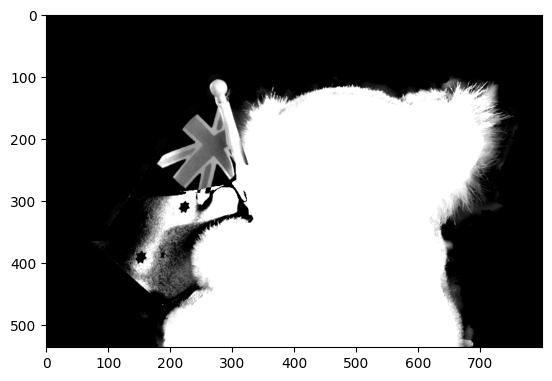

In [8]:
plt.imshow(alpha_disp, cmap = "gray")
plt.show()

In [22]:
# Split the image into its RGB channels
r, g, b = cv2.split(image)
# Create a mask where the pixel values meet the specified criteria
mask = np.logical_and.reduce([(r >= 10) & (r <= 51), (g >= 20) & (g <= 52), (b >= 34) & (b <= 87)])
change_mat = np.zeros_like(image[:,:,0])
change_mat[139:476, 81:338] = mask[139:476, 81:338]
change_mat[138:155, 124:217] = 0
change_mat[293:308, 80:121] = 0

In [23]:
# Set all locations in the alpha matte to 1 where change_mat is 1
# Convert the change_mat to a logical data type
change_mat = change_mat.astype(bool)

# # Set all locations in alpha to 1 where change_mat is true
alpha_disp[change_mat] = 255

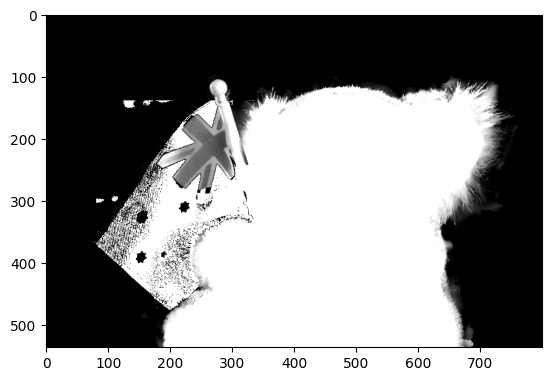

In [24]:
plt.imshow(alpha_disp, cmap = 'gray')
plt.show()

In [11]:
Bay_MSE = mse2d(alpha_disp, GT)
print("The MSE between the Ground Truth and Bayesian Alpha Matte is :", Bay_MSE)

The MSE between the Ground Truth and Bayesian Alpha Matte is : 1352.660528655727


Text(0.5, 1.0, 'Smoothed Matte')

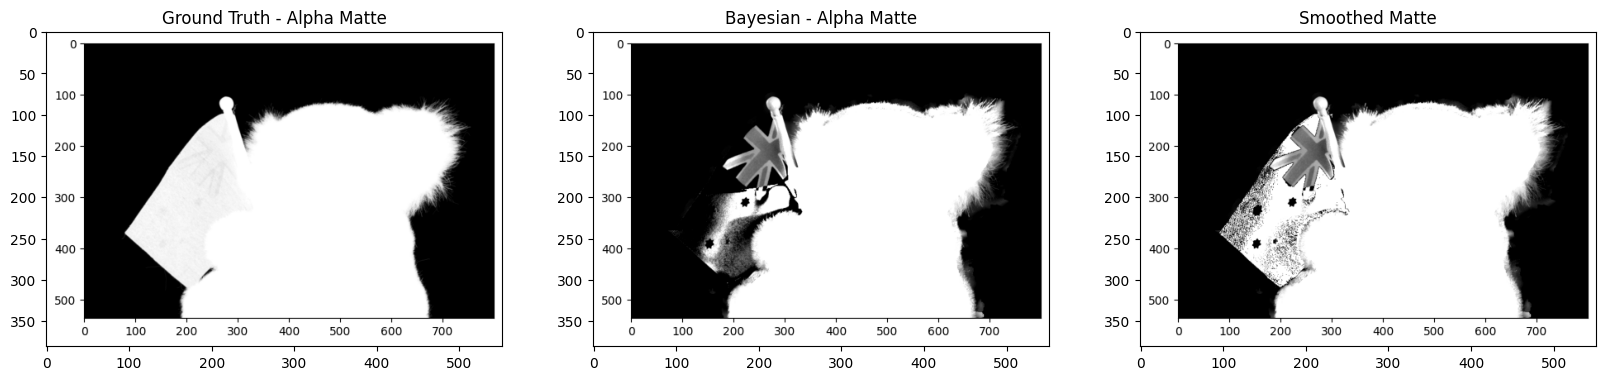

In [14]:
img1 = np.array(Image.open("C:/Users/aduttagu/Desktop/Transport - 2/GT.png"))
img2 = np.array(Image.open("C:/Users/aduttagu/Desktop/Transport - 2/Bayesian Matte.png"))
img3 = np.array(Image.open("C:/Users/aduttagu/Desktop/Transport - 2/Smoothed Matte.png"))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))
axes[0].imshow(img1, cmap='gray')
axes[0].set_title('Ground Truth - Alpha Matte')
axes[1].imshow(img2, cmap='gray')
axes[1].set_title('Bayesian - Alpha Matte')
axes[2].imshow(img3, cmap='gray')
axes[2].set_title('Smoothed Matte')

In [24]:
# Step 1 : Read image, GT and trimap.
image = np.array(Image.open(
    "C:/Users/aduttagu/Desktop/Main/Bayesian-Matting-Implementation/Image Dataset/input_training_lowres/GT05.png"))
image_trimap = np.array(ImageOps.grayscale(Image.open(
    "C:/Users/aduttagu/Desktop/Main/Bayesian-Matting-Implementation/Image Dataset/trimap_training_lowres/Trimap1/GT05.png")))
GT = np.array(ImageOps.grayscale(Image.open(
    "C:/Users/aduttagu/Desktop/Main/Bayesian-Matting-Implementation/Image Dataset/gt_training_lowres/GT05.png")))

In [25]:
# Step 2 : Calculating Bayesian Matte for the given trimap
window_size = 75
N = window_size
alpha, pixel_count = Bayesian_Matte(image, image_trimap, N)

# Step 3 : Making it back to range (0-255) for display purpose
alpha_disp = alpha * 255
alpha_int8 = np.array(alpha, dtype=int)



# Step 4 : End to End testing - 1 : Calculating the Laplacian Matting
Lalpha = Laplacianmatting(image, image_trimap)

# Step 5 : Compositing Function Display
background = np.array(Image.open(
    'C:/Users/aduttagu/Desktop/Main/Bayesian-Matting-Implementation/bayesian-Matting-Python/background.png'))
comp_Bay = compositing(image, alpha_disp, background)

# Step 6 : Smoothening ALpha Methods
smooth_alpha = smooth(alpha_disp)



Successfully Calculated : 1000.0 out of unknown Pixels : 29357.
Successfully Calculated : 2000.0 out of unknown Pixels : 29357.
Successfully Calculated : 3000.0 out of unknown Pixels : 29357.
Successfully Calculated : 4000.0 out of unknown Pixels : 29357.
Successfully Calculated : 5000.0 out of unknown Pixels : 29357.
Successfully Calculated : 6000.0 out of unknown Pixels : 29357.
Successfully Calculated : 7000.0 out of unknown Pixels : 29357.
Successfully Calculated : 8000.0 out of unknown Pixels : 29357.
Successfully Calculated : 9000.0 out of unknown Pixels : 29357.
Successfully Calculated : 10000.0 out of unknown Pixels : 29357.
Successfully Calculated : 11000.0 out of unknown Pixels : 29357.
Successfully Calculated : 12000.0 out of unknown Pixels : 29357.
Successfully Calculated : 13000.0 out of unknown Pixels : 29357.
Successfully Calculated : 14000.0 out of unknown Pixels : 29357.
Successfully Calculated : 15000.0 out of unknown Pixels : 29357.
Successfully Calculated : 16000.0 

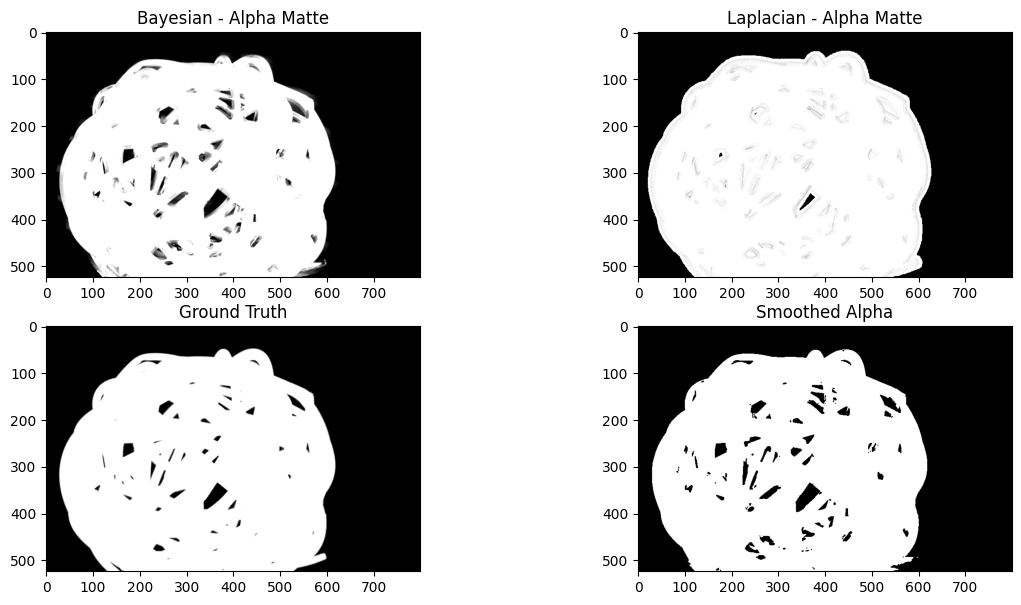

In [23]:
# Step 7 : Displaying THe Bayesian, Laplacian and GT.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (14,7))
axes[0, 0].imshow(alpha_disp, cmap='gray')
axes[0, 0].set_title('Bayesian - Alpha Matte')
axes[0, 1].imshow(Lalpha, cmap='gray')
axes[0, 1].set_title('Laplacian - Alpha Matte')
axes[1, 0].imshow(GT, cmap='gray')
axes[1, 0].set_title('Ground Truth')
axes[1, 1].imshow(smooth_alpha, cmap='gray')
axes[1, 1].set_title('Smoothed Alpha')
plt.show()